**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

**IMPORT DATASET**

In [2]:
AJP=pd.read_csv("SR1.csv")
AJP.head()

Experiment No  P ON   I   DF  P OFF  ELECTRODE     SR
0              1    50   3  200     25          1  8.023
1              2   900   9  400    500          1  7.893
2              3   200  12  600    100          1  5.525
3              4   500   6  800    200          1  7.585
4              5   900  12  200    200          2  7.915

**DEFINE X(INPUT) AND Y(OUTPUT), STANDARIZATION**

In [3]:
x=AJP.drop(['SR','Experiment No'],axis=1).values
x_mean=x.mean()
x_std=x.std()
x=(x-x_mean)/x_std
y=AJP['SR'].values
y_mean=y.mean()
y_std=y.std()
y=(y-y_mean)/y_std

**SPLIT THE DATASET IN TRAINING SET AND TEST SET**

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

**TRAIN THE MODEL ON THE TRAINING SET**

In [5]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)
ml.coef_


array([   0.21625083,   13.3548655 ,   -0.34444062,    0.39489239,
       -108.390802  ])

In [6]:
ml.intercept_

-75.134993807876

Surface Roughness ( SR )= -75.134993807876 + 0.21625083 * P ON + 13.3548655 * I - 0.34444062 * DF + 0.39489239 * P OFF - 108.390802 * ELECTRODE

**PREDICT THE TEST SET RESULTS**

In [7]:
y_pred=ml.predict(x_test)
y_pred

array([1.82738664, 0.60542434, 0.62167931, 0.22565256])

**EVALUATE THE MODEL**

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.466520619740759

In [9]:
import numpy
corr_matrix = numpy.corrcoef(y_test, y_pred)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

0.7243914182156378


**PLOT THE RESULTS**

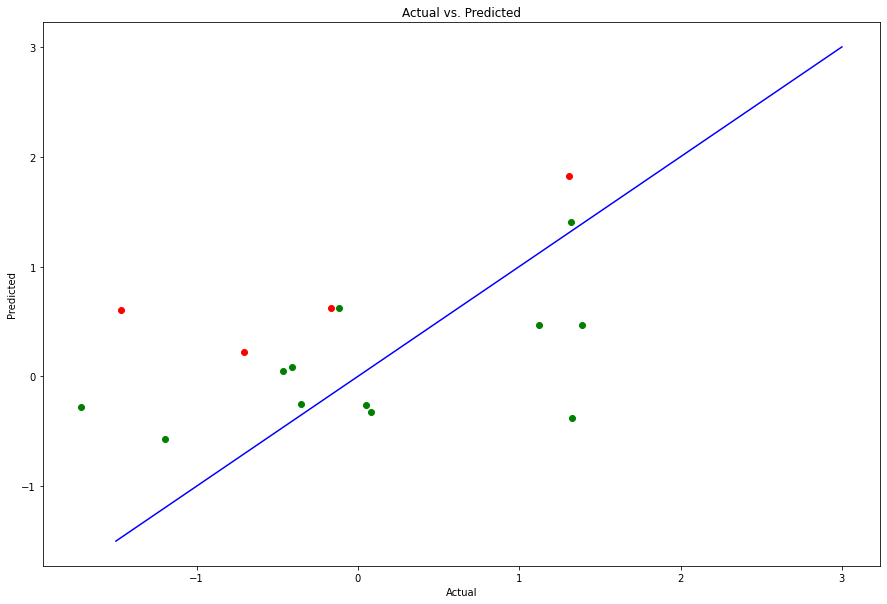

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train,ml.predict(x_train),color="green")
plt.scatter(y_test,y_pred,color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
i=np.linspace(-1.5,3)
plt.plot(i,i,color="blue")
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(mean_squared_error(y_train,ml.predict(x_train)))

1.5143322372808414
0.6660695692021166


# KFOLD CROSS VALIDATION

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
ml100 =[]
testerror100 = []
trainerror100 = []
for i in range(0,99):
    kfold = KFold(n_splits=5,shuffle=True,random_state=i)
    for train_index, test_index in kfold.split(x):
        xtrain,xtest = x[train_index],x[test_index]
        ytrain,ytest = y[train_index],y[test_index]
        ml=LinearRegression()
        ml.fit(x_train,y_train)
        ml100.append(ml)
        prediction=ml.predict(xtest)
        
        testerror100.append(mean_squared_error(ytest,prediction))
        trainerror100.append(mean_squared_error(y_train,ml.predict(x_train)))

In [13]:
import statistics
print(statistics.mean(trainerror100),",",statistics.stdev(trainerror100))
print(statistics.mean(testerror100),",",statistics.stdev(testerror100))

0.6660695692021166 , 0.0
0.8776998154115446 , 0.6046590011014299


# Plots of Statistics

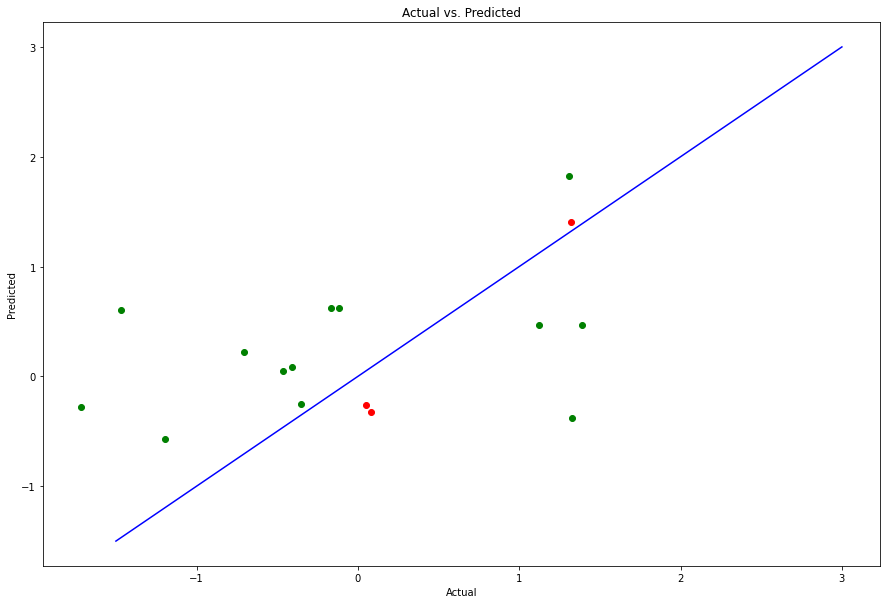

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(ytrain,ml.predict(xtrain),color="green")
plt.scatter(ytest,ml.predict(xtest),color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
i=np.linspace(-1.5,3)
plt.plot(i,i,color="blue")
plt.show()

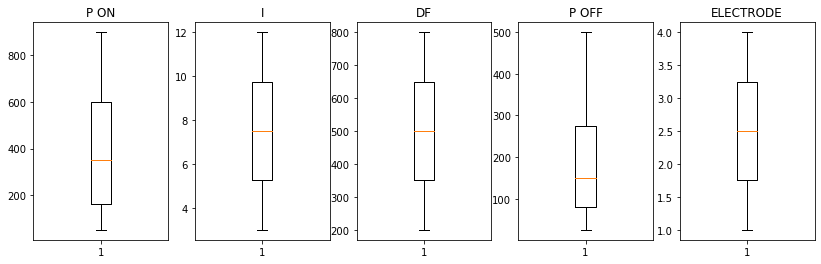

Experiment No        P ON          I          DF       P OFF  \
count      16.000000   16.000000  16.000000   16.000000   16.000000   
mean        8.500000  412.500000   7.500000  500.000000  206.250000   
std         4.760952  335.410197   3.464102  230.940108  186.525244   
min         1.000000   50.000000   3.000000  200.000000   25.000000   
25%         4.750000  162.500000   5.250000  350.000000   81.250000   
50%         8.500000  350.000000   7.500000  500.000000  150.000000   
75%        12.250000  600.000000   9.750000  650.000000  275.000000   
max        16.000000  900.000000  12.000000  800.000000  500.000000   

       ELECTRODE         SR  
count  16.000000  16.000000  
mean    2.500000   5.720688  
std     1.154701   1.713481  
min     1.000000   2.873000  
25%     1.750000   4.853250  
50%     2.500000   5.484500  
75%     3.250000   7.662000  
max     4.000000   8.023000

In [15]:
plt.figure(0, figsize=(14,4))
for i in range (1,6):
    plt.subplot(1,5,i)
    plt.boxplot(AJP[AJP.columns[i]])
    plt.title(AJP.columns[i])
plt.show()
AJP.describe()